### bank customer prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics

%matplotlib inline


### Create a classification model to predict those who will likely accept the offer of a new personal loan , by analyzing the previous historical campaign's customer behaviour data.

- Age	Customer's age in completed years							
- Experience	#years of professional experience							
- Income	Annual income of the customer 						
- Family	Family size of the customer					
- CCAvg	Avg. spending on credit cards per month 						
- Education	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional							
- Mortgage	Value of house mortgage if any. 							
- Securities Account	Does the customer have a securities account with the bank?							
- CD Account	Does the customer have a certificate of deposit (CD) account with the bank?							
- Online	Does the customer use internet banking facilities							
- CreditCard	Does the customer use a credit card issued by Bank?							
- Offer_acceptance	Did this customer accept the personal loan offered in the last campaign?							


In [2]:
import pandas as pd

In [3]:
input_data = pd.read_excel('Target_Customer_Prediction.xlsx')

In [4]:
input_data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Offer_acceptance
0,25,1,49,4,1.6,1,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1,1


In [5]:
input_data.shape

(5000, 12)

In [6]:
x = input_data.drop(['Offer_acceptance'], axis=1)
y = input_data['Offer_acceptance']

In [7]:
x.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3 )

In [9]:
from sklearn import tree 
ctree = tree.DecisionTreeClassifier()
ctree.fit(x_train, y_train)
y_pred = ctree.predict(x_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.8206666666666667


In [10]:
comp_df = pd.DataFrame()
comp_df['Class_actual'] = y_test
comp_df['Class_predicted'] = y_pred
comp_df.head(5)

,Class_actual,Class_predicted
796,1,0
3252,0,0
4988,0,1
3706,0,0
4983,0,0


In [11]:
y_test.value_counts(normalize=True)

0    0.818
1    0.182
Name: Offer_acceptance, dtype: float64

In [39]:
ctree.feature_importances_

array([0.09270343, 0.08666081, 0.31135477, 0.09997418, 0.10239829,
       0.18095836, 0.05412198, 0.00766108, 0.01618185, 0.02594069,
       0.02204455])

In [40]:
temp_imp = pd.DataFrame()
temp_imp['col'] = x.columns
temp_imp['imp'] = ctree.feature_importances_*100

temp_imp

,col,imp
0,Age,9.270343
1,Experience,8.666081
2,Income,31.135477
3,Family,9.997418
4,CCAvg,10.239829
5,Education,18.095836
6,Mortgage,5.412198
7,Securities Account,0.766108
8,CD Account,1.618185
9,Online,2.594069


In [41]:
temp_imp.sort_values('imp', ascending=False)

,col,imp
2,Income,31.135477
5,Education,18.095836
4,CCAvg,10.239829
3,Family,9.997418
0,Age,9.270343
1,Experience,8.666081
6,Mortgage,5.412198
9,Online,2.594069
10,CreditCard,2.204455
8,CD Account,1.618185


#### Model Hyperparameter Tuning

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
param_grid = { "criterion"      : ['gini', 'entropy'],    
               "max_features"   : [2, 3, 4, 5, 6, 7 ],             
               "splitter"       : ['best', 'random'],  
               "min_samples_split"  : [3, 5, 10 ],
               "max_depth"          : [2,3,4,5] ,
               "class_weight"      : [{0:1, 1:2}, {0:1, 1:5}]
               }



In [17]:
ctree_model = tree.DecisionTreeClassifier()

In [18]:
#optimized_tree = GridSearchCV(ctree_model, param_grid, scoring = 'accuracy', cv = 5, verbose=3)
optimized_tree = GridSearchCV(ctree_model, param_grid, scoring = 'recall', cv = 5, verbose=3)

In [19]:
optimized_tree.fit(x_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_split=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_split=3, splitter=best, score=0.0625, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_split=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_split=3, splitter=best, score=0.4921875, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_split=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_split=3, splitter=best, score=0.5703125, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_split=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_split=10, splitter=best, score=0.28125, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_split=10, splitter=best, score=0.11023622047244094, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_split=10, splitter=best, score=0.5511811023622047, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_split=10, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=2, min_samples_split=10, splitter=random, score=0.0, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=4, min_samples_split=3, splitter=random, score=0.28346456692913385, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=4, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=4, min_samples_split=3, splitter=random, score=0.10236220472440945, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=4, min_samples_split=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=4, min_samples_split=5, splitter=best, score=0.5078125, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=4, min_samples_split=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=4, min_samples_split=5, splitter=best, score=0.5625, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=5, min_samples_split=10, splitter=best, score=0.625, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=5, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=5, min_samples_split=10, splitter=best, score=0.28125, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=5, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=5, min_samples_split=10, splitter=best, score=0.41732283464566927, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=5, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=5, min_samples_split=10, splitter=best, score=0.2125984251968504, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, 

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=7, min_samples_split=3, splitter=random, score=0.421875, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=7, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=7, min_samples_split=3, splitter=random, score=0.546875, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=7, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=7, min_samples_split=3, splitter=random, score=0.4881889763779528, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=7, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=2, max_features=7, min_samples_split=3, splitter=random, score=0.33858267716535434, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, ma

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=2, min_samples_split=10, splitter=best, score=0.40625, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=2, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=2, min_samples_split=10, splitter=best, score=0.3984375, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=2, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=2, min_samples_split=10, splitter=best, score=0.33858267716535434, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=2, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=2, min_samples_split=10, splitter=best, score=0.2440944881889764, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=4, min_samples_split=3, splitter=random, score=0.3984375, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=4, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=4, min_samples_split=3, splitter=random, score=0.265625, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=4, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=4, min_samples_split=3, splitter=random, score=0.28346456692913385, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=4, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=4, min_samples_split=3, splitter=random, score=0.1732283464566929, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, m

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=5, min_samples_split=5, splitter=random, score=0.05511811023622047, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=5, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=5, min_samples_split=10, splitter=best, score=0.53125, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=5, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=5, min_samples_split=10, splitter=best, score=0.578125, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=5, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=5, min_samples_split=10, splitter=best, score=0.5546875, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_f

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=7, min_samples_split=3, splitter=best, score=0.5390625, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=7, min_samples_split=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=7, min_samples_split=3, splitter=best, score=0.36220472440944884, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=7, min_samples_split=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=7, min_samples_split=3, splitter=best, score=0.4645669291338583, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=7, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=3, max_features=7, min_samples_split=3, splitter=random, score=0.3984375, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=2, min_samples_split=5, splitter=random, score=0.18110236220472442, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=2, min_samples_split=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=2, min_samples_split=5, splitter=random, score=0.07874015748031496, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=2, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=2, min_samples_split=10, splitter=best, score=0.4375, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=2, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=2, min_samples_split=10, splitter=best, score=0.484375, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_dep

[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=4, min_samples_split=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=4, min_samples_split=3, splitter=best, score=0.4094488188976378, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=4, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=4, min_samples_split=3, splitter=random, score=0.25, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=4, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=4, min_samples_split=3, splitter=random, score=0.40625, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=4, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=4, min_samples_split=3, sp

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=5, min_samples_split=5, splitter=random, score=0.31496062992125984, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=5, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=5, min_samples_split=10, splitter=best, score=0.484375, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=5, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=5, min_samples_split=10, splitter=best, score=0.5, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=5, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=5, min_samples_split=10, splitter=best, score=0.546875, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_featur

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=7, min_samples_split=3, splitter=best, score=0.47244094488188976, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=7, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=7, min_samples_split=3, splitter=random, score=0.40625, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=7, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=7, min_samples_split=3, splitter=random, score=0.5078125, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=7, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, max_features=7, min_samples_split=3, splitter=random, score=0.4609375, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=4, 

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=2, min_samples_split=5, splitter=random, score=0.15625, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=2, min_samples_split=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=2, min_samples_split=5, splitter=random, score=0.2125984251968504, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=2, min_samples_split=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=2, min_samples_split=5, splitter=random, score=0.15748031496062992, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=2, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=2, min_samples_split=10, splitter=best, score=0.2421875, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=3, min_samples_split=10, splitter=random, score=0.1953125, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=3, min_samples_split=10, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=3, min_samples_split=10, splitter=random, score=0.5625, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=3, min_samples_split=10, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=3, min_samples_split=10, splitter=random, score=0.3046875, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=3, min_samples_split=10, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=3, min_samples_split=10, splitter=random, score=0.2283464566929134, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_de

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=5, min_samples_split=5, splitter=best, score=0.453125, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=5, min_samples_split=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=5, min_samples_split=5, splitter=best, score=0.5234375, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=5, min_samples_split=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=5, min_samples_split=5, splitter=best, score=0.40625, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=5, min_samples_split=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=5, min_samples_split=5, splitter=best, score=0.3464566929133858, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=5

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=6, min_samples_split=10, splitter=best, score=0.53125, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=6, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=6, min_samples_split=10, splitter=best, score=0.4921875, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=6, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=6, min_samples_split=10, splitter=best, score=0.4094488188976378, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=6, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=6, min_samples_split=10, splitter=best, score=0.4566929133858268, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=gini, max_depth=

[CV]  class_weight={0: 1, 1: 2}, criterion=gini, max_depth=5, max_features=7, min_samples_split=10, splitter=random, score=0.4566929133858268, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=2, min_samples_split=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=2, min_samples_split=3, splitter=best, score=0.0, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=2, min_samples_split=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=2, min_samples_split=3, splitter=best, score=0.53125, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=2, min_samples_split=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=2, min_samples_split=3, splitter=best, score=0.0703125, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_dept

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=3, min_samples_split=3, splitter=random, score=0.16535433070866143, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=3, min_samples_split=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=3, min_samples_split=5, splitter=best, score=0.4609375, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=3, min_samples_split=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=3, min_samples_split=5, splitter=best, score=0.578125, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=3, min_samples_split=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=3, min_samples_split=5, splitter=best, score=0.28125, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, 

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=4, min_samples_split=10, splitter=best, score=0.16535433070866143, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=4, min_samples_split=10, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=4, min_samples_split=10, splitter=random, score=0.1875, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=4, min_samples_split=10, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=4, min_samples_split=10, splitter=random, score=0.1328125, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=4, min_samples_split=10, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=4, min_samples_split=10, splitter=random, score=0.546875, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, cri

[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=6, min_samples_split=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=6, min_samples_split=3, splitter=best, score=0.3543307086614173, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=6, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=6, min_samples_split=3, splitter=random, score=0.1953125, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=6, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=6, min_samples_split=3, splitter=random, score=0.4296875, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=6, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_feat

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=7, min_samples_split=5, splitter=random, score=0.484375, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=7, min_samples_split=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=7, min_samples_split=5, splitter=random, score=0.484375, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=7, min_samples_split=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=7, min_samples_split=5, splitter=random, score=0.171875, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=7, min_samples_split=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=2, max_features=7, min_samples_split=5, splitter=random, score=0.44881889763779526, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criteri

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=3, min_samples_split=3, splitter=best, score=0.5234375, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=3, min_samples_split=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=3, min_samples_split=3, splitter=best, score=0.5546875, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=3, min_samples_split=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=3, min_samples_split=3, splitter=best, score=0.36220472440944884, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=3, min_samples_split=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=3, min_samples_split=3, splitter=best, score=0.44881889763779526, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterio

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=4, min_samples_split=5, splitter=best, score=0.609375, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=4, min_samples_split=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=4, min_samples_split=5, splitter=best, score=0.4453125, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=4, min_samples_split=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=4, min_samples_split=5, splitter=best, score=0.5039370078740157, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=4, min_samples_split=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=4, min_samples_split=5, splitter=best, score=0.4409448818897638, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=e

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=5, min_samples_split=10, splitter=random, score=0.3828125, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=5, min_samples_split=10, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=5, min_samples_split=10, splitter=random, score=0.1968503937007874, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=5, min_samples_split=10, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=5, min_samples_split=10, splitter=random, score=0.15748031496062992, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=6, min_samples_split=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=6, min_samples_split=3, splitter=best, score=0.4765625, total=   0.0s
[CV] class_weight={0: 1, 1

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=7, min_samples_split=5, splitter=best, score=0.5234375, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=7, min_samples_split=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=7, min_samples_split=5, splitter=best, score=0.5625, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=7, min_samples_split=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=7, min_samples_split=5, splitter=best, score=0.47244094488188976, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=7, min_samples_split=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=3, max_features=7, min_samples_split=5, splitter=best, score=0.36220472440944884, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=e

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=2, min_samples_split=10, splitter=random, score=0.328125, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=2, min_samples_split=10, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=2, min_samples_split=10, splitter=random, score=0.1875, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=2, min_samples_split=10, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=2, min_samples_split=10, splitter=random, score=0.2421875, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=2, min_samples_split=10, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=2, min_samples_split=10, splitter=random, score=0.2283464566929134, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, cr

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=4, min_samples_split=3, splitter=random, score=0.2265625, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=4, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=4, min_samples_split=3, splitter=random, score=0.3046875, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=4, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=4, min_samples_split=3, splitter=random, score=0.46875, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=4, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=4, min_samples_split=3, splitter=random, score=0.47244094488188976, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criter

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=5, min_samples_split=5, splitter=random, score=0.2734375, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=5, min_samples_split=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=5, min_samples_split=5, splitter=random, score=0.4375, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=5, min_samples_split=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=5, min_samples_split=5, splitter=random, score=0.375, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=5, min_samples_split=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=5, min_samples_split=5, splitter=random, score=0.48031496062992124, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=e

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=6, min_samples_split=10, splitter=random, score=0.578125, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=6, min_samples_split=10, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=6, min_samples_split=10, splitter=random, score=0.5859375, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=6, min_samples_split=10, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=6, min_samples_split=10, splitter=random, score=0.34375, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=6, min_samples_split=10, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=4, max_features=6, min_samples_split=10, splitter=random, score=0.23622047244094488, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, 

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=2, min_samples_split=3, splitter=random, score=0.140625, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=2, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=2, min_samples_split=3, splitter=random, score=0.2109375, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=2, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=2, min_samples_split=3, splitter=random, score=0.0625, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=2, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=2, min_samples_split=3, splitter=random, score=0.3937007874015748, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=3, min_samples_split=5, splitter=random, score=0.15625, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=3, min_samples_split=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=3, min_samples_split=5, splitter=random, score=0.2047244094488189, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=3, min_samples_split=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=3, min_samples_split=5, splitter=random, score=0.31496062992125984, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=3, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=3, min_samples_split=10, splitter=best, score=0.5078125, total=   0.0s
[CV] class_weight={0: 1, 1: 2},

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=4, min_samples_split=10, splitter=random, score=0.2440944881889764, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=5, min_samples_split=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=5, min_samples_split=3, splitter=best, score=0.453125, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=5, min_samples_split=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=5, min_samples_split=3, splitter=best, score=0.5390625, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=5, min_samples_split=3, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=5, min_samples_split=3, splitter=best, score=0.5703125, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=6, min_samples_split=3, splitter=random, score=0.3858267716535433, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=6, min_samples_split=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=6, min_samples_split=5, splitter=best, score=0.4765625, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=6, min_samples_split=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=6, min_samples_split=5, splitter=best, score=0.5390625, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=6, min_samples_split=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=6, min_samples_split=5, splitter=best, score=0.3515625, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy

[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=7, min_samples_split=5, splitter=best, score=0.5546875, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=7, min_samples_split=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=7, min_samples_split=5, splitter=best, score=0.4566929133858268, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=7, min_samples_split=5, splitter=best 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=7, min_samples_split=5, splitter=best, score=0.49606299212598426, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=7, min_samples_split=5, splitter=random 
[CV]  class_weight={0: 1, 1: 2}, criterion=entropy, max_depth=5, max_features=7, min_samples_split=5, splitter=random, score=0.4453125, total=   0.0s
[CV] class_weight={0: 1, 1: 2}, crite

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=2, min_samples_split=5, splitter=random, score=0.640625, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=2, min_samples_split=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=2, min_samples_split=5, splitter=random, score=0.8828125, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=2, min_samples_split=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=2, min_samples_split=5, splitter=random, score=0.6484375, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=2, min_samples_split=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=2, min_samples_split=5, splitter=random, score=0.3543307086614173, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=3, min_samples_split=10, splitter=best, score=0.5234375, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=3, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=3, min_samples_split=10, splitter=best, score=0.609375, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=3, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=3, min_samples_split=10, splitter=best, score=0.7165354330708661, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=3, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=3, min_samples_split=10, splitter=best, score=0.44881889763779526, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_dept

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=5, min_samples_split=3, splitter=best, score=0.3984375, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=5, min_samples_split=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=5, min_samples_split=3, splitter=best, score=0.5984251968503937, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=5, min_samples_split=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=5, min_samples_split=3, splitter=best, score=0.5826771653543307, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=5, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=5, min_samples_split=3, splitter=random, score=0.8984375, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=6, min_samples_split=3, splitter=random, score=0.3203125, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=6, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=6, min_samples_split=3, splitter=random, score=0.29133858267716534, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=6, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=6, min_samples_split=3, splitter=random, score=0.3779527559055118, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=6, min_samples_split=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=6, min_samples_split=5, splitter=best, score=0.625, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_dept

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=7, min_samples_split=5, splitter=best, score=0.6377952755905512, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=7, min_samples_split=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=7, min_samples_split=5, splitter=random, score=0.6640625, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=7, min_samples_split=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=7, min_samples_split=5, splitter=random, score=0.5625, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=7, min_samples_split=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, max_features=7, min_samples_split=5, splitter=random, score=0.5546875, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=2, ma

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=2, min_samples_split=10, splitter=best, score=0.71875, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=2, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=2, min_samples_split=10, splitter=best, score=0.296875, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=2, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=2, min_samples_split=10, splitter=best, score=0.4330708661417323, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=2, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=2, min_samples_split=10, splitter=best, score=0.5511811023622047, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=4, min_samples_split=3, splitter=best, score=0.4296875, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=4, min_samples_split=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=4, min_samples_split=3, splitter=best, score=0.65625, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=4, min_samples_split=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=4, min_samples_split=3, splitter=best, score=0.84251968503937, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=4, min_samples_split=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=4, min_samples_split=3, splitter=best, score=0.6141732283464567, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_fe

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=5, min_samples_split=5, splitter=best, score=0.640625, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=5, min_samples_split=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=5, min_samples_split=5, splitter=best, score=0.640625, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=5, min_samples_split=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=5, min_samples_split=5, splitter=best, score=0.640625, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=5, min_samples_split=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=5, min_samples_split=5, splitter=best, score=0.6062992125984252, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=5

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=6, min_samples_split=5, splitter=random, score=0.49606299212598426, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=6, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=6, min_samples_split=10, splitter=best, score=0.5703125, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=6, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=6, min_samples_split=10, splitter=best, score=0.546875, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=6, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=6, min_samples_split=10, splitter=best, score=0.6484375, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=7, min_samples_split=10, splitter=random, score=0.5390625, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=7, min_samples_split=10, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=7, min_samples_split=10, splitter=random, score=0.5984251968503937, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=7, min_samples_split=10, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=3, max_features=7, min_samples_split=10, splitter=random, score=0.4645669291338583, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=2, min_samples_split=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=2, min_samples_split=3, splitter=best, score=0.5234375, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, 

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=3, min_samples_split=5, splitter=best, score=0.5078125, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=3, min_samples_split=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=3, min_samples_split=5, splitter=best, score=0.53125, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=3, min_samples_split=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=3, min_samples_split=5, splitter=best, score=0.6484375, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=3, min_samples_split=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=3, min_samples_split=5, splitter=best, score=0.5826771653543307, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=4, min_samples_split=10, splitter=random, score=0.546875, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=4, min_samples_split=10, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=4, min_samples_split=10, splitter=random, score=0.3515625, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=4, min_samples_split=10, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=4, min_samples_split=10, splitter=random, score=0.7952755905511811, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=4, min_samples_split=10, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=4, min_samples_split=10, splitter=random, score=0.5905511811023622, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=g

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=6, min_samples_split=3, splitter=random, score=0.31496062992125984, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=6, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=6, min_samples_split=3, splitter=random, score=0.5511811023622047, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=6, min_samples_split=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=6, min_samples_split=5, splitter=best, score=0.5546875, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=6, min_samples_split=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=6, min_samples_split=5, splitter=best, score=0.640625, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=7, min_samples_split=10, splitter=best, score=0.546875, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=7, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=7, min_samples_split=10, splitter=best, score=0.609375, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=7, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=7, min_samples_split=10, splitter=best, score=0.6484375, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=7, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_features=7, min_samples_split=10, splitter=best, score=0.4881889763779528, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=4, max_fe

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=3, min_samples_split=3, splitter=random, score=0.53125, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=3, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=3, min_samples_split=3, splitter=random, score=0.3984375, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=3, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=3, min_samples_split=3, splitter=random, score=0.421875, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=3, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=3, min_samples_split=3, splitter=random, score=0.41732283464566927, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5,

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=4, min_samples_split=10, splitter=best, score=0.53125, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=4, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=4, min_samples_split=10, splitter=best, score=0.5703125, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=4, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=4, min_samples_split=10, splitter=best, score=0.609375, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=4, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=4, min_samples_split=10, splitter=best, score=0.4015748031496063, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_fea

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=6, min_samples_split=3, splitter=best, score=0.5703125, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=6, min_samples_split=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=6, min_samples_split=3, splitter=best, score=0.44881889763779526, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=6, min_samples_split=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=6, min_samples_split=3, splitter=best, score=0.5433070866141733, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=6, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=6, min_samples_split=3, splitter=random, score=0.6015625, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=

[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=7, min_samples_split=5, splitter=best, score=0.4881889763779528, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=7, min_samples_split=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=7, min_samples_split=5, splitter=best, score=0.5511811023622047, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=7, min_samples_split=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=7, min_samples_split=5, splitter=random, score=0.5390625, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=7, min_samples_split=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=gini, max_depth=5, max_features=7, min_samples_split=5, splitter=random, score=0.5859375, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=gini, max_dep

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=2, min_samples_split=10, splitter=random, score=0.4765625, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=2, min_samples_split=10, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=2, min_samples_split=10, splitter=random, score=0.48031496062992124, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=2, min_samples_split=10, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=2, min_samples_split=10, splitter=random, score=0.16535433070866143, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=3, min_samples_split=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=3, min_samples_split=3, splitter=best, score=0.5546875, total=   0.0s
[CV] class_weight={0: 1, 

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=4, min_samples_split=5, splitter=random, score=0.703125, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=4, min_samples_split=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=4, min_samples_split=5, splitter=random, score=0.296875, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=4, min_samples_split=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=4, min_samples_split=5, splitter=random, score=0.5826771653543307, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=4, min_samples_split=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=4, min_samples_split=5, splitter=random, score=0.30708661417322836, total=   0.0s
[CV] class_weight={0: 1, 1: 5

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=6, min_samples_split=3, splitter=random, score=0.265625, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=6, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=6, min_samples_split=3, splitter=random, score=0.5, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=6, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=6, min_samples_split=3, splitter=random, score=0.7109375, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=6, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=6, min_samples_split=3, splitter=random, score=0.3700787401574803, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=en

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=7, min_samples_split=10, splitter=best, score=0.2734375, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=7, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=7, min_samples_split=10, splitter=best, score=0.6796875, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=7, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=7, min_samples_split=10, splitter=best, score=0.6015625, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=7, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=2, max_features=7, min_samples_split=10, splitter=best, score=0.5984251968503937, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=en

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=3, min_samples_split=3, splitter=random, score=0.609375, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=3, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=3, min_samples_split=3, splitter=random, score=0.546875, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=3, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=3, min_samples_split=3, splitter=random, score=0.4921875, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=3, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=3, min_samples_split=3, splitter=random, score=0.5826771653543307, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criteri

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=4, min_samples_split=10, splitter=best, score=0.671875, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=4, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=4, min_samples_split=10, splitter=best, score=0.609375, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=4, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=4, min_samples_split=10, splitter=best, score=0.4566929133858268, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=4, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=4, min_samples_split=10, splitter=best, score=0.5039370078740157, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, crite

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=6, min_samples_split=3, splitter=random, score=0.6328125, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=6, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=6, min_samples_split=3, splitter=random, score=0.609375, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=6, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=6, min_samples_split=3, splitter=random, score=0.48031496062992124, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=6, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=6, min_samples_split=3, splitter=random, score=0.4881889763779528, total=   0.0s
[CV] class_weight={0: 1, 1: 

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=7, min_samples_split=10, splitter=best, score=0.5703125, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=7, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=7, min_samples_split=10, splitter=best, score=0.6171875, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=7, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=7, min_samples_split=10, splitter=best, score=0.5703125, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=7, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=3, max_features=7, min_samples_split=10, splitter=best, score=0.5275590551181102, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=en

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=3, min_samples_split=3, splitter=random, score=0.71875, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=3, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=3, min_samples_split=3, splitter=random, score=0.4375, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=3, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=3, min_samples_split=3, splitter=random, score=0.453125, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=3, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=3, min_samples_split=3, splitter=random, score=0.4094488188976378, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=e

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=4, min_samples_split=10, splitter=best, score=0.4609375, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=4, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=4, min_samples_split=10, splitter=best, score=0.640625, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=4, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=4, min_samples_split=10, splitter=best, score=0.44881889763779526, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=4, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=4, min_samples_split=10, splitter=best, score=0.6062992125984252, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, cri

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=6, min_samples_split=3, splitter=best, score=0.5546875, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=6, min_samples_split=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=6, min_samples_split=3, splitter=best, score=0.6484375, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=6, min_samples_split=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=6, min_samples_split=3, splitter=best, score=0.4375, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=6, min_samples_split=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=6, min_samples_split=3, splitter=best, score=0.5275590551181102, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max

[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=7, min_samples_split=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=7, min_samples_split=5, splitter=best, score=0.5703125, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=7, min_samples_split=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=7, min_samples_split=5, splitter=best, score=0.59375, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=7, min_samples_split=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=7, min_samples_split=5, splitter=best, score=0.4881889763779528, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=7, min_samples_split=5, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=4, max_features=7, min_

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=2, min_samples_split=10, splitter=best, score=0.5039370078740157, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=2, min_samples_split=10, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=2, min_samples_split=10, splitter=random, score=0.3671875, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=2, min_samples_split=10, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=2, min_samples_split=10, splitter=random, score=0.5078125, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=2, min_samples_split=10, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=2, min_samples_split=10, splitter=random, score=0.4609375, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, 

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=4, min_samples_split=3, splitter=best, score=0.5984251968503937, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=4, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=4, min_samples_split=3, splitter=random, score=0.5546875, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=4, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=4, min_samples_split=3, splitter=random, score=0.515625, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=4, min_samples_split=3, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=4, min_samples_split=3, splitter=random, score=0.609375, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=5, min_samples_split=5, splitter=random, score=0.375, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=5, min_samples_split=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=5, min_samples_split=5, splitter=random, score=0.4251968503937008, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=5, min_samples_split=5, splitter=random 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=5, min_samples_split=5, splitter=random, score=0.4881889763779528, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=5, min_samples_split=10, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=5, min_samples_split=10, splitter=best, score=0.546875, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, cri

[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=7, min_samples_split=3, splitter=best, score=0.578125, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=7, min_samples_split=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=7, min_samples_split=3, splitter=best, score=0.578125, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=7, min_samples_split=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=7, min_samples_split=3, splitter=best, score=0.5196850393700787, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=7, min_samples_split=3, splitter=best 
[CV]  class_weight={0: 1, 1: 5}, criterion=entropy, max_depth=5, max_features=7, min_samples_split=3, splitter=best, score=0.5275590551181102, total=   0.0s
[CV] class_weight={0: 1, 1: 5}, criterion=en

[Parallel(n_jobs=1)]: Done 2880 out of 2880 | elapsed:   27.1s finished
C:\Users\jp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_features': [2, 3, 4, 5, 6, 7], 'splitter': ['best', 'random'], 'min_samples_split': [3, 5, 10], 'max_depth': [2, 3, 4, 5], 'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 5}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=3)

In [20]:
optimized_tree.best_params_

{'class_weight': {0: 1, 1: 5},
 'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 2,
 'min_samples_split': 3,
 'splitter': 'random'}

In [21]:
optimized_tree.best_estimator_

DecisionTreeClassifier(class_weight={0: 1, 1: 5}, criterion='entropy',
            max_depth=2, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

In [22]:
optimized_tree.best_score_

0.7481517329865016

In [23]:
#optimized_tree.cv_results_

In [24]:
ctree_final = optimized_tree.best_estimator_

y_pred = ctree_final.predict(x_test)
metrics.accuracy_score(y_test, y_pred) 

0.212

In [25]:
y_pred_prob = ctree_final.predict_proba(x_test)
cust_likelihood = y_pred_prob[ :,  1]*100
cust_likelihood

array([53.06274437, 55.55555556, 53.06274437, ..., 53.06274437,
       53.06274437, 53.06274437])

In [26]:
comp_df = x_test.copy()
comp_df['actual'] = y_test
comp_df['predicted'] = y_pred
comp_df['propensity'] = cust_likelihood
 
comp_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,actual,predicted,propensity
796,30,6,82,2,2.5,1,0,0,0,0,0,1,1,53.062744
3252,62,38,78,2,0.0,3,0,0,0,1,0,0,1,55.555556
4988,34,8,85,1,2.5,1,136,0,0,0,1,0,1,53.062744
3706,58,33,51,2,1.6,3,123,0,0,1,0,0,1,53.062744
4983,51,26,72,1,2.9,1,0,0,0,0,0,0,1,53.062744


In [27]:
metrics.recall_score(y_test, y_pred)

0.978021978021978

In [28]:
metrics.precision_score(y_test, y_pred)

0.18503118503118504

In [29]:
y_test.value_counts()

0    1227
1     273
Name: Offer_acceptance, dtype: int64

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(y_test, y_pred)

array([[  51, 1176],
       [   6,  267]], dtype=int64)

In [32]:
metrics.recall_score(y_test, y_pred)

0.978021978021978

In [33]:
metrics.precision_score(y_test, y_pred)

0.18503118503118504

#### Model Predicted Probability

In [34]:
x_test.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
796,30,6,82,2,2.5,1,0,0,0,0,0
3252,62,38,78,2,0.0,3,0,0,0,1,0
4988,34,8,85,1,2.5,1,136,0,0,0,1
3706,58,33,51,2,1.6,3,123,0,0,1,0
4983,51,26,72,1,2.9,1,0,0,0,0,0


In [35]:
y_pred_prob = ctree_final.predict_proba(x_test)
y_pred_prob

array([[0.46937256, 0.53062744],
       [0.44444444, 0.55555556],
       [0.46937256, 0.53062744],
       ...,
       [0.46937256, 0.53062744],
       [0.46937256, 0.53062744],
       [0.46937256, 0.53062744]])

In [36]:
from sklearn.model_selection import GridSearchCV
param_grid = { "criterion"      : ['gini', 'entropy'],    
               "max_features"   : [2, 3, 4, 5, 6, 7 ],             
               "splitter"       : ['best', 'random'],  
               "min_samples_split"  : [3, 5, 10 ],
               "max_depth"          : [2,3,4,5] ,
               "class_weight"      : [{0:1, 1:2}, {0:1, 1:5}]
               }
ctree_model = tree.DecisionTreeClassifier()
optimized_tree = GridSearchCV(ctree_model, param_grid, scoring = 'accuracy', cv=5) 
optimized_tree.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_features': [2, 3, 4, 5, 6, 7], 'splitter': ['best', 'random'], 'min_samples_split': [3, 5, 10], 'max_depth': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [43]:
optimized_tree.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 7,
 'min_samples_split': 5,
 'splitter': 'best'}

In [37]:
ctree_final = optimized_tree.best_estimator_
y_pred = ctree_final.predict(x_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred) )
print('Sensitivity :', metrics.recall_score(y_test, y_pred))
print('Precision :', metrics.precision_score(y_test, y_pred))

Accuracy : 0.8893333333333333
Sensitivity : 0.42857142857142855
Precision : 0.9212598425196851


In [38]:
y_pred_prob = ctree_final.predict_proba(x_test)
y_pred_prob

array([[0.91262755, 0.08737245],
       [0.91262755, 0.08737245],
       [0.89015152, 0.10984848],
       ...,
       [0.91262755, 0.08737245],
       [0.91262755, 0.08737245],
       [0.89015152, 0.10984848]])

In [ ]:
# prediction class based on default threshold prob = 0.5
df_prediction = x_test.copy()
df_prediction['actual_class'] = y_test
df_prediction['pred_class'] = y_pred
df_prediction['prob_1'] = y_pred_prob[:,1]
df_prediction.head(25)

### ROC Curver and Area under Curve (AUC) : 
- Provide the sensitivity and specificity values for differrent threshold values without actually changing the threshold.
- ROC will help to choosing the threshold that balance the sensitivity and specificity

In [ ]:
print(metrics.roc_auc_score(y_test, y_pred))

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1])

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 18
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

- AUC is the percentage of the ROC plot that is underneath the curve:
- AUC is useful as a single number summary of classifier performance.
- If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will   
   assign a higher predicted probability to the positive observation.

In [ ]:
df_threshold = pd.DataFrame()
df_threshold['tpr'] = tpr
df_threshold['fpr'] = fpr
df_threshold['prob'] = thresholds  # probability(1)
df_threshold

In [ ]:
# prediction class based on new threshold prob = 0.11
df_prediction.loc[df_prediction['prob_1'] >=.108, 'pred_class_new'] = '1'
df_prediction.loc[df_prediction['prob_1'] <.108, 'pred_class_new'] = '0'
df_prediction['pred_class_new'] = df_prediction['pred_class_new'].astype(int)
df_prediction.head(10)

In [ ]:
# accuracy at threshold=.13
print( 'accuracy = ' , metrics.accuracy_score(df_prediction.actual_class, df_prediction.pred_class_new))
print( 'sensitivity(tpr) = ' , metrics.recall_score(df_prediction.actual_class, df_prediction.pred_class_new))
print( 'precision = ' , metrics.precision_score(df_prediction.actual_class, df_prediction.pred_class_new))

#### Model Variance 

In [44]:
optimized_tree.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 7,
 'min_samples_split': 5,
 'splitter': 'best'}

In [42]:
ctree_final.fit(x_train, y_train)
#
y_pred = ctree_final.predict(x_test)
metrics.accuracy_score(y_test, y_pred) 

0.8886666666666667

In [49]:
metrics.recall_score(y_test, y_pred)

0.42857142857142855

In [50]:
metrics.precision_score(y_test, y_pred)

0.9212598425196851

In [45]:
import numpy as np

k = 50
perf = []
models = []


for i in range(k):
    models.append(ctree_final.fit(x_train, y_train))
    y_pred = ctree_final.predict(x_test)
    perf.append(metrics.accuracy_score(y_test, y_pred))
    
perf = np.array(perf)
print(perf)
print('Avg Performance :', perf.mean())
print('Model Variance  :' , perf.std())
    

[0.87666667 0.89       0.88733333 0.89       0.88733333 0.88066667
 0.89333333 0.88666667 0.88933333 0.884      0.88466667 0.89333333
 0.89333333 0.89       0.88933333 0.888      0.88       0.89
 0.88866667 0.88133333 0.888      0.88733333 0.88666667 0.89066667
 0.88933333 0.88733333 0.89066667 0.89066667 0.88466667 0.89
 0.886      0.89       0.888      0.88466667 0.89066667 0.88733333
 0.888      0.88933333 0.88533333 0.876      0.87733333 0.874
 0.88733333 0.88933333 0.886      0.888      0.884      0.89133333
 0.892      0.88933333]
Avg Performance : 0.8870666666666668
Model Variance  : 0.004389887368841153


In [47]:
avg_perf = np.zeros_like(perf, dtype=float)
avg_perf.fill(perf.mean())
print(avg_perf)

[0.88706667 0.88706667 0.88706667 0.88706667 0.88706667 0.88706667
 0.88706667 0.88706667 0.88706667 0.88706667 0.88706667 0.88706667
 0.88706667 0.88706667 0.88706667 0.88706667 0.88706667 0.88706667
 0.88706667 0.88706667 0.88706667 0.88706667 0.88706667 0.88706667
 0.88706667 0.88706667 0.88706667 0.88706667 0.88706667 0.88706667
 0.88706667 0.88706667 0.88706667 0.88706667 0.88706667 0.88706667
 0.88706667 0.88706667 0.88706667 0.88706667 0.88706667 0.88706667
 0.88706667 0.88706667 0.88706667 0.88706667 0.88706667 0.88706667
 0.88706667 0.88706667]


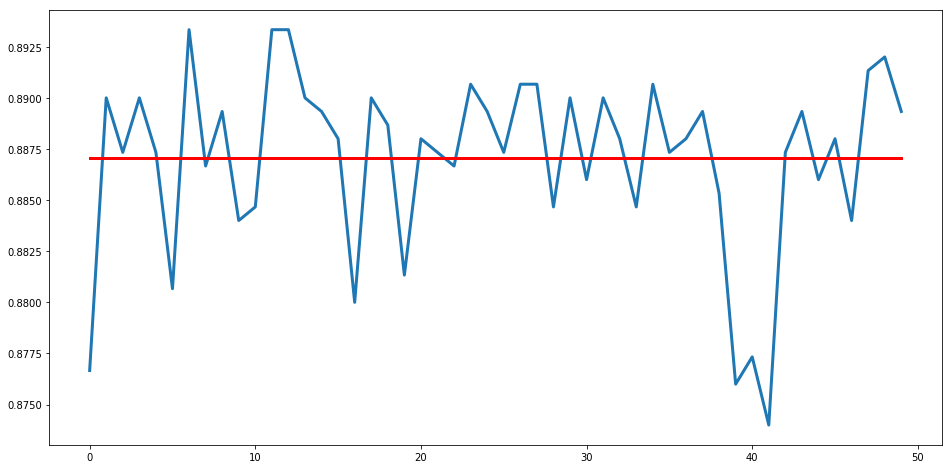

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"]=(16,8) 
plt.plot(perf, linewidth=3)
plt.plot(avg_perf, 'r', linewidth=3)

In [ ]:
import pickle
pickle.dump(ctree_final, open('Bank_Cust_Pred_Ctree_16_jul.pk', 'wb'))